# Исследовательский анализ данных

Анализ данных, полученных после [интеграции](../src/data/integration.ipynb)

| Feature (англ.)            | Feature (рус.)                       | Description                                                                                     |
|----------------------------|--------------------------------------|-------------------------------------------------------------------------------------------------|
| year                       | Год                                  | The year of the data represented, e.g., 2022                                                    |
| month                      | Месяц                                | The month of the data represented, e.g, 01                                                      |
| day                        | День                                 | The day of the data represented, e.g., 01                                                       |
| fips                       | FIPS-код                             | The FIPS code for the U.S. county, e.g., 01001                                                  |
| lat_lower_left             | Широта нижнего левого угла           | The latitude of the lower left corner of the grid, e.g., 32.34                                  |
| lon_lower_left             | Долгота нижнего левого угла          | The longitude of the lower left corner of the grid, e.g., -86.91                                |
| lat_upper_right            | Широта верхнего правого угла         | The latitude of the upper right corner of the grid, e.g., 32.46                                 |
| lon_upper_right            | Долгота верхнего правого угла        | The longitude of the upper right corner of the grid, e.g., -86.18                               |
| temperature_avg            | Средняя температура                  | 2 metre averaged temperature during a day/month. Unit: K                                        |
| temperature_max            | Максимальная температура             | 2 metre maximal temperature during a day/month. Unit: K                                         |
| temperature_min            | Минимальная температура              | 2 metre minimal temperature during a day/month. Unit: K                                         |
| precipitation              | Осадки                               | Total precipitation. Unit: kg/m²                                                                |
| humidity_relative          | Относительная влажность              | 2 metre relative humidity. Unit: %                                                              |
| wind_gust                  | Порыв ветра                          | Wind gust on the ground. Unit: m/s                                                              |
| wind_speed                 | Скорость ветра                       | Wind speed on the ground. Unit: m/s                                                             |
| wind_u_component           | U-компонент ветра                    | The horizontal speed of air moving towards East (negative=westward). Unit: m/s                  |
| wind_v_component           | V-компонент ветра                    | The horizontal speed of air moving towards North (negative=southward). Unit: m/s                |
| solar_radiation_downward   | Падающая солнечная радиация          | Total shortwave radiation reaching Earth's surface. Unit: W/m²                                  |
| vapor_pressure_deficit     | Дефицит давления пара                | The amount of drying power the air has upon the plant. Unit: kPa                                |
| skin_reservoir_content     | Содержание поверхностного резервуара | Skin reservoir content (water retained on soil/vegetation surface). Unit: m of water equivalent |
| soil_water_vol_layer1      | Объёмная влажность почвы (слой 1)    | Volumetric soil water layer 1 (0-7 cm). Units: m³/m³                                            |
| soil_water_vol_layer2      | Объёмная влажность почвы (слой 2)    | Volumetric soil water layer 2 (7-28 cm). Units: m³/m³                                           |
| soil_water_vol_layer3      | Объёмная влажность почвы (слой 3)    | Volumetric soil water layer 3 (28-100 cm). Units: m³/m³                                         |
| images                     | Путь к изображениям                  | Path to images, e.g., 17001-2020-01-01 (`<fips>-<year>-<month>-<day>`)                          |
| target_year                | Год целевой переменной               | Matches the year of the object with the target                                                  |
| yield_bu_per_acre          | Урожайность (бушелей/акр)            | The annual yield information                                                                    |

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

PATH_DATA = Path("../data/interim/")

In [ ]:
data = pd.read_csv(PATH_DATA / "X.csv")
data = pd.merge(
    data, pd.read_csv(PATH_DATA / "y.csv"), how="inner", on=["year", "fips"]
)
units_dict = {
    "year": None,
    "month": None,
    "day": None,
    "fips": None,
    "lat_lower_left": None,
    "lon_lower_left": None,
    "lat_upper_right": None,
    "lon_upper_right": None,
    "temperature_avg": r"$K$",
    "temperature_max": r"$K$",
    "temperature_min": r"$K$",
    "precipitation": r"$kg/m^{2}$",
    "humidity_relative": r"$\%$",
    "wind_gust": r"$m/s$",
    "wind_speed": r"$m/s$",
    "wind_u_component": r"$m/s$",
    "wind_v_component": r"$m/s$",
    "solar_radiation_downward": r"$W/m^{2}$",
    "vapor_pressure_deficit": r"$kPa$",
    "skin_reservoir_content": r"$m\ of\ water\ equivalent$",
    "soil_water_vol_layer1": r"$m^{3}/m^{3}$",
    "soil_water_vol_layer2": r"$m^{3}/m^{3}$",
    "soil_water_vol_layer3": r"$m^{3}/m^{3}$",
    "yield_bu_per_acre": r"$bu/acre$",
    "images": None,
}
display(data.shape)
display(data.head(5))

(23851, 25)

year  month  day   fips  lat_lower_left  lon_lower_left  lat_upper_right  \
0  2017      1    1  17001       39.757070      -91.512974        40.201142   
1  2017      1    1  17003       36.970298      -89.518393        37.335109   
2  2017      1    1  17005       38.740532      -89.639265        39.028246   
3  2017      1    1  17007       42.152320      -88.940388        42.495046   
4  2017      1    1  17009       39.839326      -90.916609        40.104452   

   lon_upper_right  temperature_avg  temperature_max  ...  wind_u_component  \
0       -90.911969       271.179458       277.953833  ...         -1.088250   
1       -89.132685       278.895222       279.990333  ...         -1.617778   
2       -89.250447       273.343167       278.295833  ...         -0.968167   
3       -88.705633       269.882667       276.064667  ...          1.660667   
4       -90.513747       270.900375       277.884625  ...         -0.725500   

   wind_v_component  solar_radiation_downward  vapor_pressure_deficit  \
0          0.448125               2534.504167                0.156208   
1         -1.395667                 93.600000                0.077778   
2         -0.968833               1884.466667                0.105667   
3          1.708333               2307.933333                0.130000   
4          0.162250               2616.700000                0.149625   

   skin_reservoir_content  soil_water_vol_layer1  soil_water_vol_layer2  \
0            2.210587e-06               0.344100               0.353680   
1            1.673908e-04               0.377405               0.380358   
2            8.501940e-07               0.460806               0.469670   
3            2.168740e-06               0.364323               0.371426   
4            1.629814e-06               0.332199               0.339814   

   soil_water_vol_layer3            images  yield_bu_per_acre  
0               0.328251  17001-2017-01-01              192.2  
1               0.356879  17003-2017-01-01              159.4  
2               0.489816  17005-2017-01-01              170.7  
3               0.342623  17007-2017-01-01              189.9  
4               0.299648  17009-2017-01-01              188.7  

[5 rows x 25 columns]

In [3]:
data.isna().sum().sum()

np.int64(0)

***

## Географические данные

In [4]:
import warnings
import geopandas as gpd


def plot_map(data: pd.Series, title: str) -> None:
    """Карта USA

    Args:
        data (pd.Series): значения параметра (напр, yield_bu_per_acre). Индекс: fips-коды
        title (str): название карты
    """

    # Загрузка шейпфайлов для штатов и округов
    # https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html
    states = gpd.read_file(
        "../resources/USA-map/cb_2018_us_state_500k/cb_2018_us_state_500k.shp"
    )
    counties = gpd.read_file(
        "../resources/USA-map/cb_2018_us_county_500k/cb_2018_us_county_500k.shp"
    )

    # Создаем FIPS-код
    counties["FIPS"] = counties["STATEFP"] + counties["COUNTYFP"]

    # Объединяем данные
    data.index = data.index.astype(str)
    merged = counties.merge(data, how="left", left_on="FIPS", right_index=True)

    # Исключаем Аляску, Гавайи и территории
    exclude_states = ["02", "15", "60", "66", "69", "72", "78"]
    merged = merged[~merged["STATEFP"].isin(exclude_states)]
    states = states[~states["STATEFP"].isin(exclude_states)]

    # Рисуем карту
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))

    merged.plot(
        column="yield_bu_per_acre",
        cmap="YlOrBr",
        linewidth=0.2,
        ax=ax,
        edgecolor="0.6",
        legend=True,
        missing_kwds={"color": "lightgrey", "label": "Нет данных"},
    )

    # Добавляем границы штатов
    states.boundary.plot(ax=ax, linewidth=1.0, edgecolor="black")

    # Добавляем названия штатов
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", UserWarning)
        states["coords"] = states["geometry"].centroid
    for idx, row in states.iterrows():
        plt.annotate(
            text=row["STUSPS"],  # Почтовый код штата, например, "CA"
            xy=(row["coords"].x, row["coords"].y),
            horizontalalignment="center",
            fontsize=8,
            color="black",
            weight="bold",
        )

    # Оформление
    ax.set_title(title, fontsize=18)
    ax.axis("off")

    plt.tight_layout()
    plt.show()

### Средние значения `yield_bu_per_acre` по `fips` 

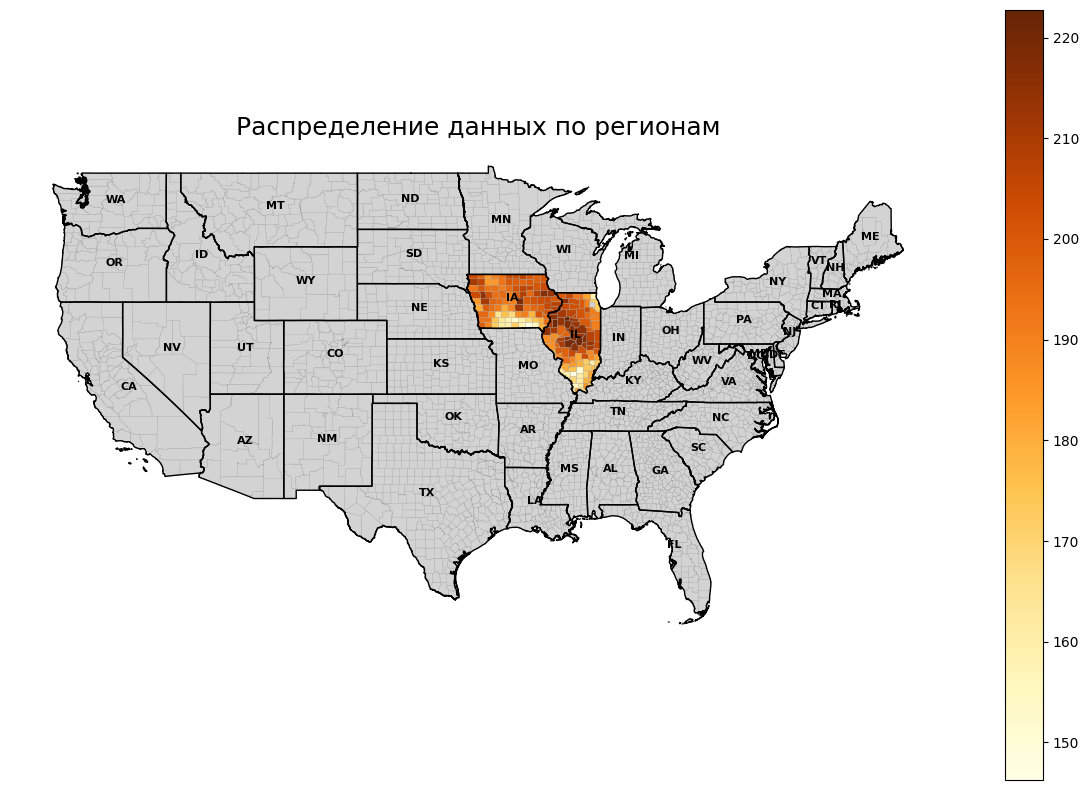

In [5]:
plot_map(
    data.groupby("fips")["yield_bu_per_acre"].mean(),
    "Распределение данных по регионам",
)

### Изменение средних показателей по месяцам по `fips`

In [6]:
import matplotlib.animation as animation
from IPython.display import HTML
from mpl_toolkits.axes_grid1 import make_axes_locatable


def create_animation(
    data: pd.DataFrame, values: str, title: str, colorbar_label: str
):
    # Загрузка шейпфайлов для штатов и округов
    states = gpd.read_file(
        "../resources/USA-map/cb_2018_us_state_500k/cb_2018_us_state_500k.shp"
    )
    counties = gpd.read_file(
        "../resources/USA-map/cb_2018_us_county_500k/cb_2018_us_county_500k.shp"
    )

    # Создаем FIPS-код
    counties["FIPS"] = counties["STATEFP"] + counties["COUNTYFP"]

    # Исключаем Аляску, Гавайи и территории
    exclude_states = ["02", "15", "60", "66", "69", "72", "78"]
    counties = counties[~counties["STATEFP"].isin(exclude_states)]
    states = states[~states["STATEFP"].isin(exclude_states)]

    # Сортируем даты для анимации
    dates = np.sort(data["month"].unique())

    # Определяем глобальные min и max для цветовой шкалы
    vmin = data[values].min()
    vmax = data[values].max()

    # Создаем фигуру и ось для colorbar
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)

    # Создаем пустой ScalarMappable для colorbar
    sm = plt.cm.ScalarMappable(
        cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax)
    )
    fig.colorbar(sm, cax=cax, label=colorbar_label)

    def update(frame):
        ax.clear()
        date = dates[frame]
        date_str = f"{date:02d}"

        # Фильтруем данные по дате
        month_data = data[(data["month"] == date)]

        # Создаем Series для слияния
        data_series = month_data.set_index("fips")[values]
        data_series.index = data_series.index.astype(str)

        # Объединяем данные
        merged = counties.merge(
            data_series, how="left", left_on="FIPS", right_index=True
        )

        # Рисуем карту с фиксированными vmin и vmax
        merged.plot(
            column=values,
            cmap="coolwarm",
            linewidth=0.2,
            ax=ax,
            edgecolor="0.6",
            legend=False,
            vmin=vmin,
            vmax=vmax,
            missing_kwds={"color": "lightgrey", "label": "Нет данных"},
        )

        # Добавляем границы штатов
        states.boundary.plot(ax=ax, linewidth=1.0, edgecolor="black")

        # Добавляем названия штатов
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", UserWarning)
            states["coords"] = states["geometry"].centroid
        for idx, row in states.iterrows():
            ax.annotate(
                text=row["STUSPS"],
                xy=(row["coords"].x, row["coords"].y),
                horizontalalignment="center",
                fontsize=8,
                color="black",
                weight="bold",
            )

        ax.set_title(
            f"{title}\nМесяц: {date_str}",
            fontsize=18,
        )
        ax.axis("off")

    # Создаем анимацию
    ani = animation.FuncAnimation(
        fig,
        update,
        frames=len(dates),
        interval=500,
        repeat=True,
    )

    plt.close(fig)
    return HTML(ani.to_jshtml())

#### Изменение средней температуры по месяцам по `fips`

In [7]:
temperature_avg = (
    data[["month", "fips", "temperature_avg"]]
    .groupby(["month", "fips"])["temperature_avg"]
    .mean()
    .reset_index()
)
temperature_avg["temperature_avg"] -= 273.15
create_animation(
    data=temperature_avg,
    values="temperature_avg",
    title="Средняя температура по округам США",
    colorbar_label="Температура (°C)",
)

#### Изменение средней влажности почвы (layer1) по месяцам по `fips`

In [8]:
soil_water_vol_layer1 = (
    data[["month", "fips", "soil_water_vol_layer1"]]
    .groupby(["month", "fips"])["soil_water_vol_layer1"]
    .mean()
    .reset_index()
)
create_animation(
    data=soil_water_vol_layer1,
    values="soil_water_vol_layer1",
    title="Средняя влажность почвы (layer1) по округам США",
    colorbar_label="Влажность почвы ($m³/m⁻³$)",
)

***
## Временные данные

### Зависимость признаков от времени

In [9]:
drop_cols = [
    "day",
    "fips",
    "lat_lower_left",
    "lon_lower_left",
    "lat_upper_right",
    "lon_upper_right",
    "images",
]
temp_data = data.drop(drop_cols, axis=1)
# avg_months = data.groupby(["year", "month", "fips"]).mean().reset_index()

In [10]:
avg_months = temp_data.groupby(["year", "month"]).mean().reset_index()
avg_months.dtypes

year                          int64
month                         int64
temperature_avg             float64
temperature_max             float64
temperature_min             float64
precipitation               float64
humidity_relative           float64
wind_gust                   float64
wind_speed                  float64
wind_u_component            float64
wind_v_component            float64
solar_radiation_downward    float64
vapor_pressure_deficit      float64
skin_reservoir_content      float64
soil_water_vol_layer1       float64
soil_water_vol_layer2       float64
soil_water_vol_layer3       float64
yield_bu_per_acre           float64
dtype: object

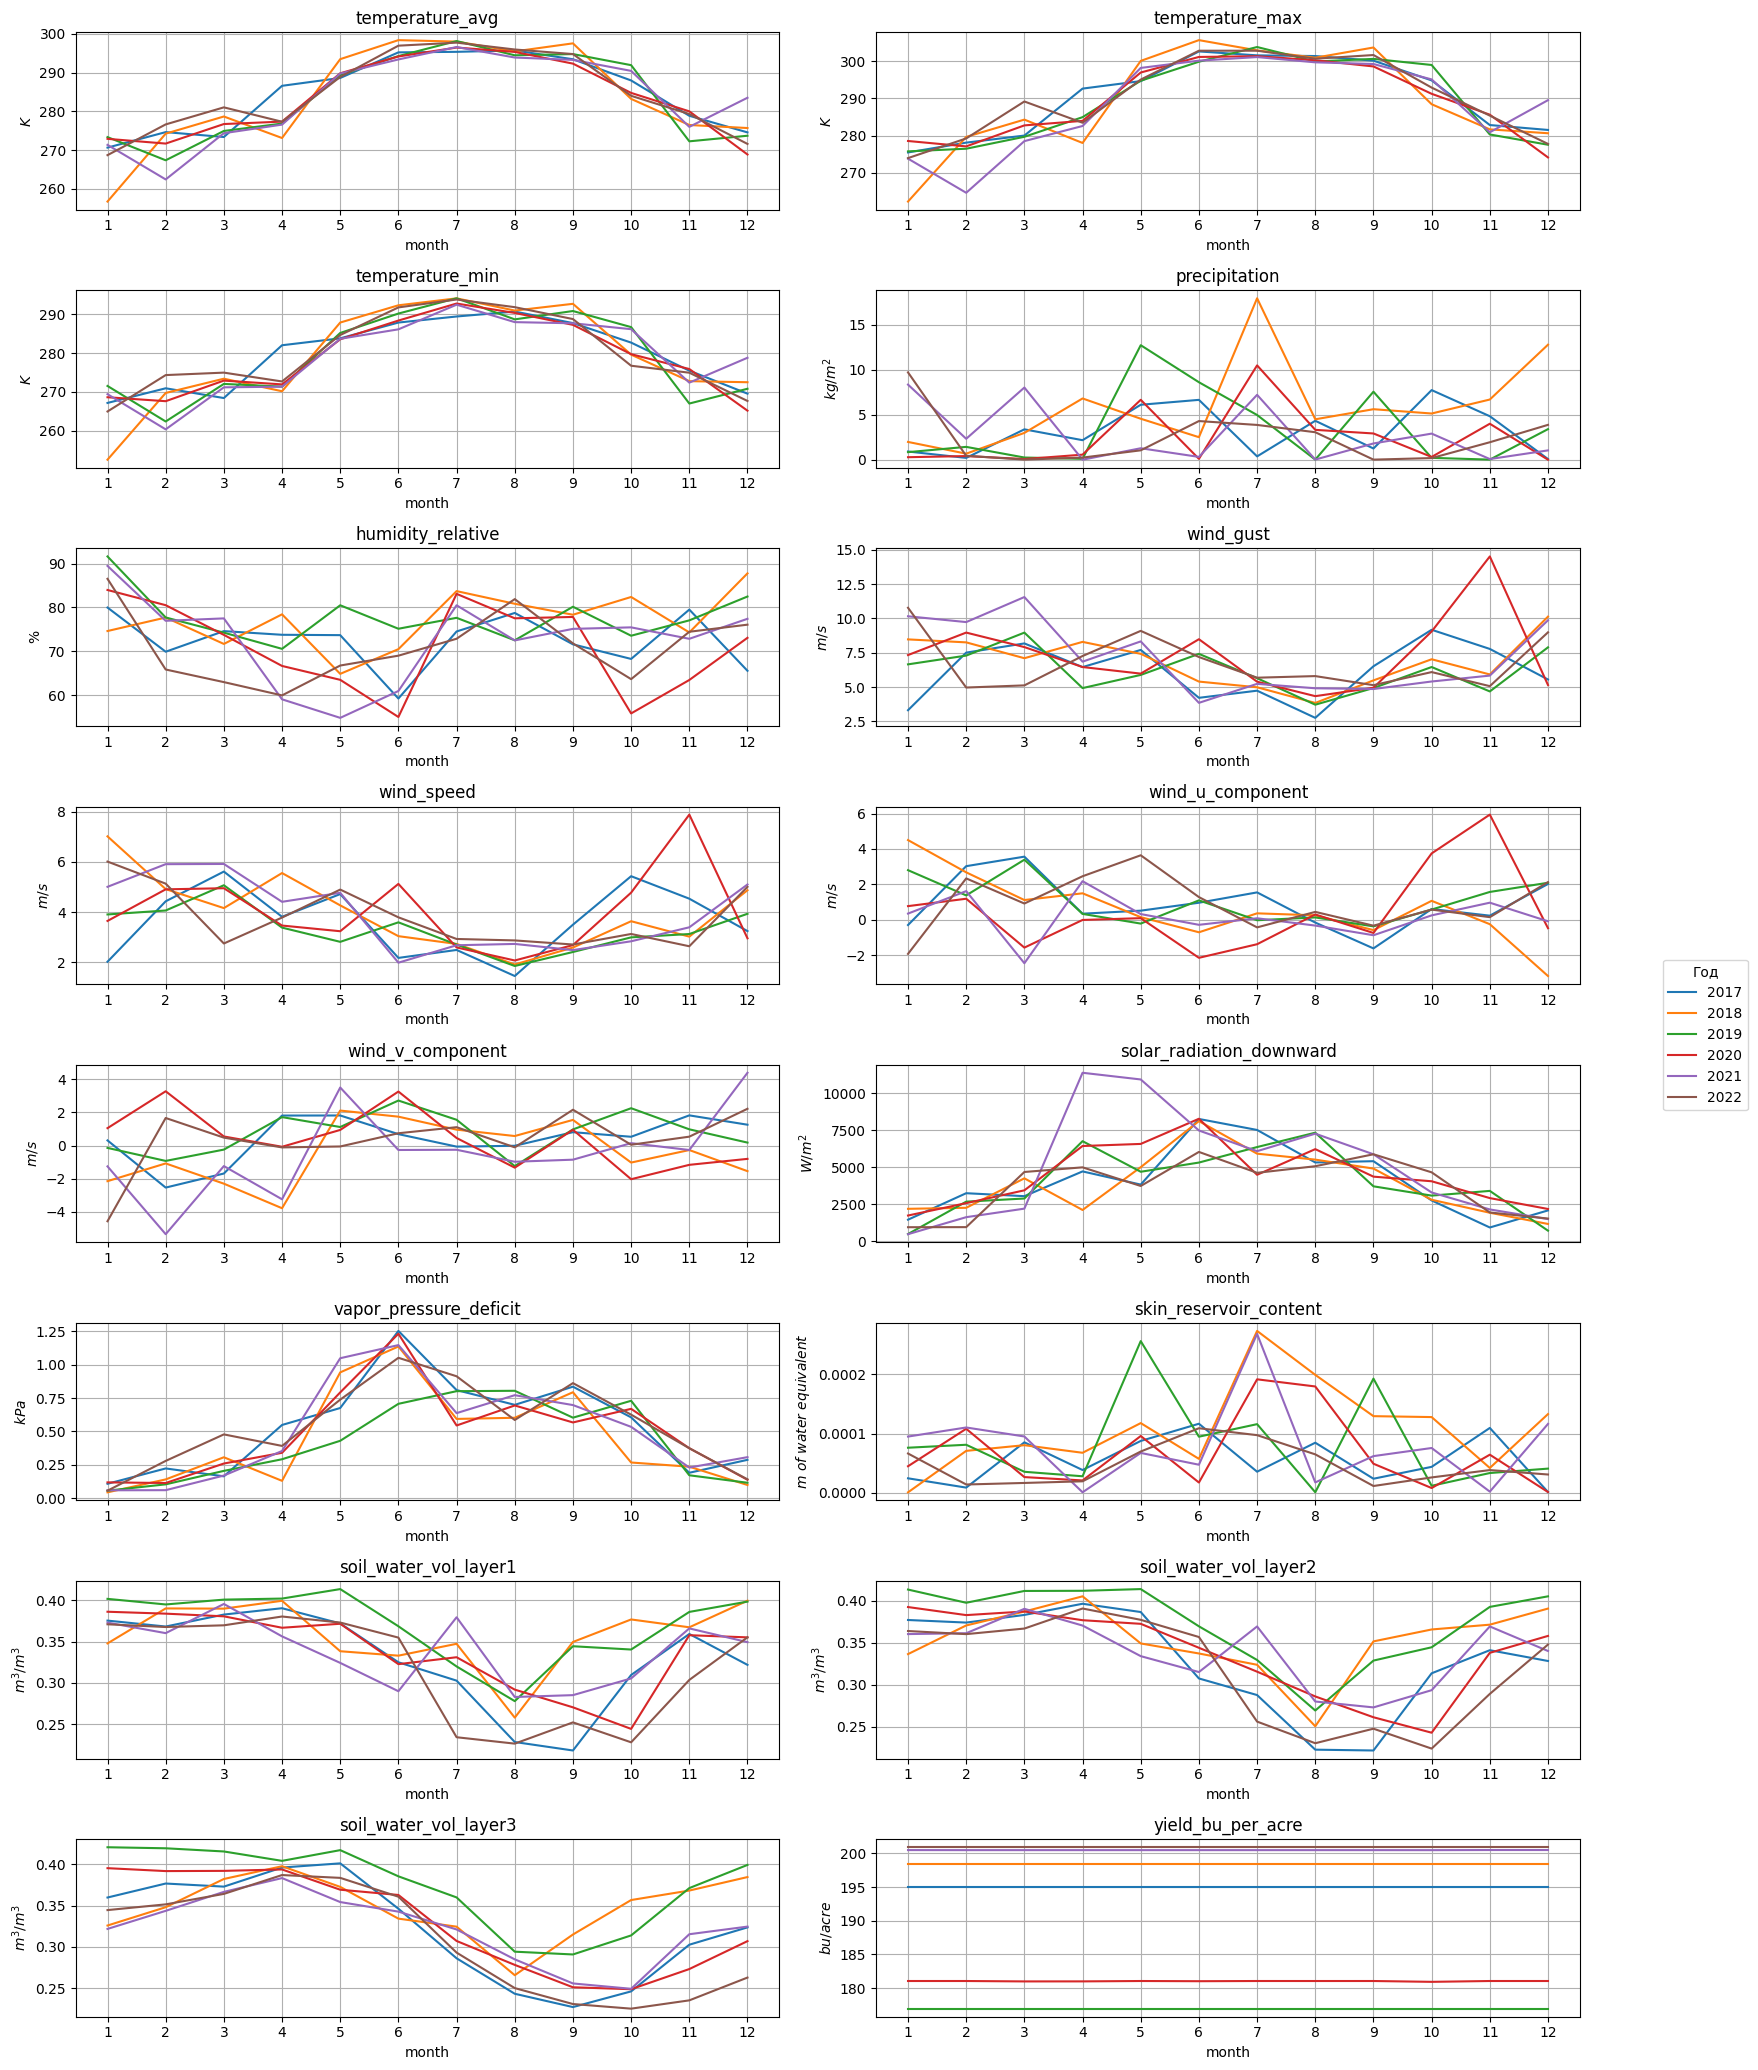

In [11]:
cols = 2
rows = avg_months.shape[1] // cols + avg_months.shape[1] % cols - 1
fig, axs = plt.subplots(rows, cols, figsize=(16, rows * 2.6))

# удаляем лишние графики
for idx in range(len(avg_months.columns.drop(["year", "month"])) % cols):
    axs[-1, -idx - 1].axis("off")

for i, feature in enumerate(avg_months.columns.drop(["year", "month"])):
    i, j = divmod(i, cols)
    ax = axs[i, j]
    plot = sns.lineplot(
        data,
        x="month",
        y=feature,
        hue="year",
        palette="tab10",
        ax=ax,
        legend=False,
        errorbar=None,
    )
    ax.set_title(feature)
    ax.set_xlabel("month")
    ax.set_ylabel(units_dict[feature])
    ax.set_xticks(range(1, 13))
    ax.grid(True)
    # Сохраняем линии для общей легенды
    if i == 0 and j == 0:
        lines_for_legend = plot.get_lines()

# Создаём общую легенду вне графиков
fig.legend(
    handles=lines_for_legend,
    labels=[str(year) for year in sorted(data["year"].unique())],
    title="Год",
    loc="center right",  # Позиционируем по центру справа
    bbox_to_anchor=(1.1, 0.5),  # Сдвигаем легенду правее
    frameon=True,  # Рамка вокруг легенды
)

# Увеличиваем правое поле, чтобы легенда поместилась
plt.subplots_adjust(right=0.85)
fig.tight_layout()

***

## Box plots

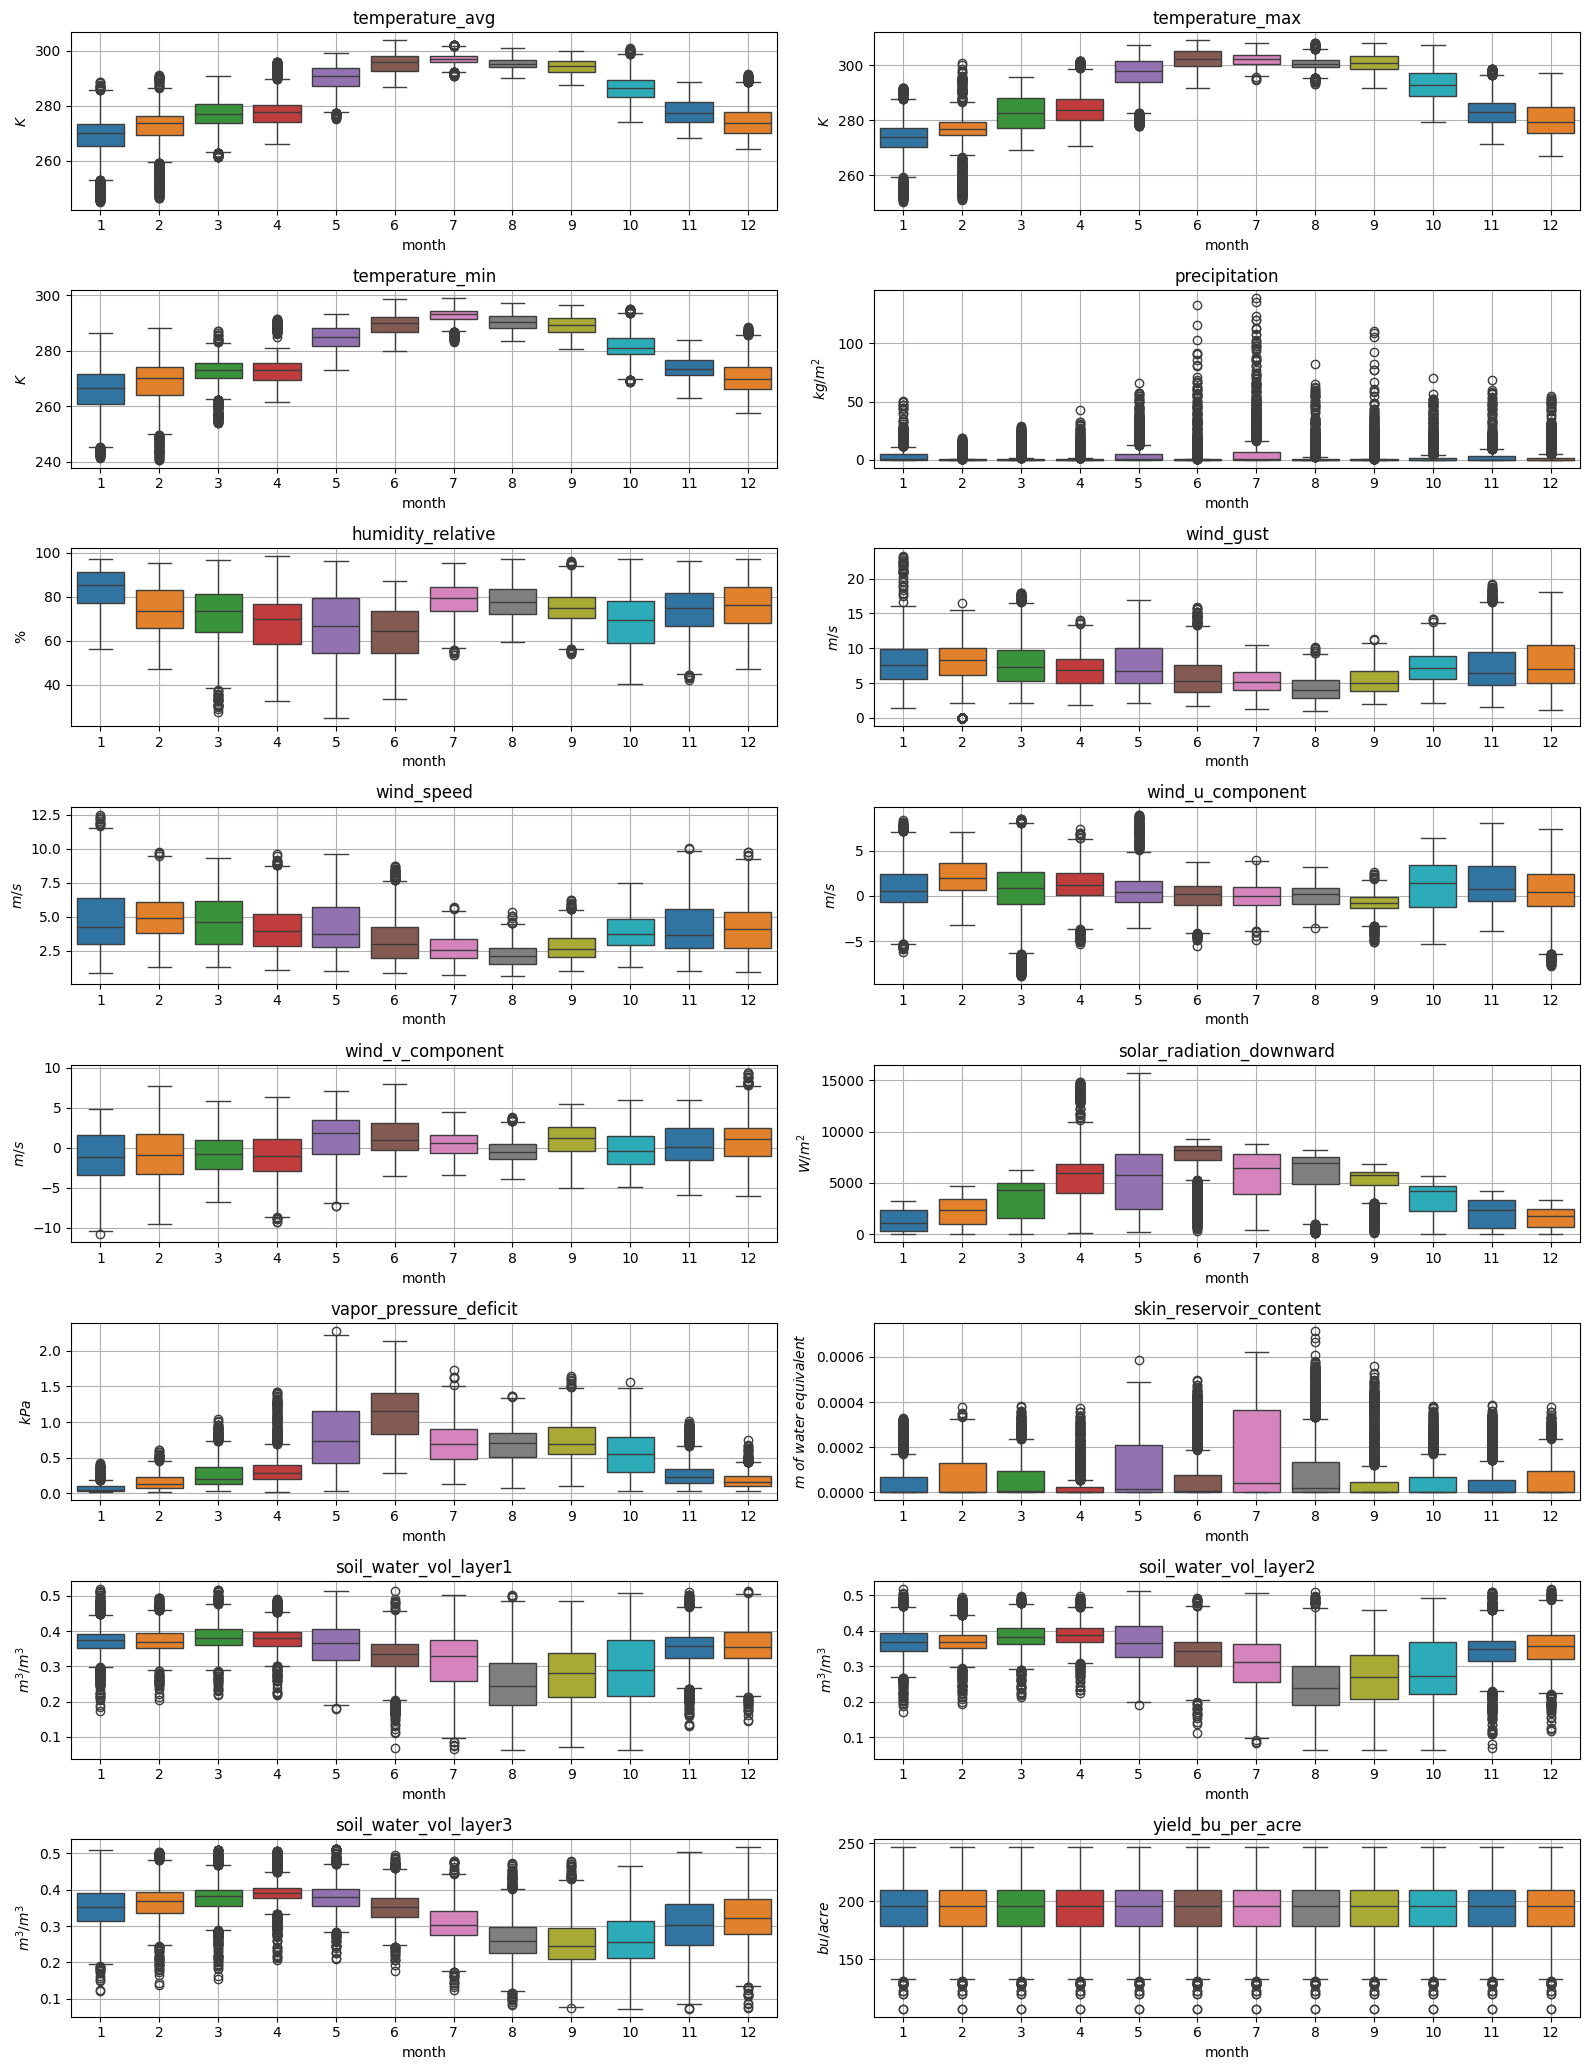

In [12]:
cols = 2
rows = avg_months.shape[1] // cols + avg_months.shape[1] % cols - 1
fig, axs = plt.subplots(rows, cols, figsize=(16, rows * 2.6))

# удаляем лишние графики
for idx in range(len(avg_months.columns.drop(["year", "month"])) % cols):
    axs[-1, -idx - 1].axis("off")

for i, feature in enumerate(avg_months.columns.drop(["year", "month"])):
    i, j = divmod(i, cols)
    ax = axs[i, j]
    plot = sns.boxplot(
        data,
        y=feature,
        x="month",  # Используем месяц для оси X
        hue="month",  # Группируем по годам
        palette="tab10",
        ax=ax,
        legend=False,
    )
    ax.set_title(feature)
    ax.set_xlabel("month")
    ax.set_ylabel(units_dict[feature])
    ax.set_xticks(range(12))  # 12 месяцев
    ax.set_xticklabels(range(1, 13))  # Метки от 1 до 12
    ax.grid(True)


# Увеличиваем правое поле, чтобы легенда поместилась
plt.subplots_adjust(right=0.85)
fig.tight_layout()

## Корреляционный анализ

Нет смысла рассматривать корреляцию между признаками и целевой переменной, т.к. целевая переменная не изменяется в течение года

In [13]:
drop_cols = [
    "day",
    "fips",
    "lat_lower_left",
    "lon_lower_left",
    "lat_upper_right",
    "lon_upper_right",
    "images",
]

corr_features = data.drop(
    ["year", "month", "day"] + drop_cols,
    axis=1,
)

In [14]:
corr_matrix = corr_features.corr()

| Feature (англ.)            | Feature (рус.)                       | Description                                                                                     |
|----------------------------|--------------------------------------|-------------------------------------------------------------------------------------------------|
| temperature_avg            | Средняя температура                  | 2 metre averaged temperature during a day/month. Unit: K                                        |
| temperature_max            | Максимальная температура             | 2 metre maximal temperature during a day/month. Unit: K                                         |
| temperature_min            | Минимальная температура              | 2 metre minimal temperature during a day/month. Unit: K                                         |
| precipitation              | Осадки                               | Total precipitation. Unit: kg/m²                                                                |
| humidity_relative          | Относительная влажность              | 2 metre relative humidity. Unit: %                                                              |
| wind_gust                  | Порыв ветра                          | Wind gust on the ground. Unit: m/s                                                              |
| wind_speed                 | Скорость ветра                       | Wind speed on the ground. Unit: m/s                                                             |
| wind_u_component           | U-компонент ветра                    | The horizontal speed of air moving towards East (negative=westward). Unit: m/s                  |
| wind_v_component           | V-компонент ветра                    | The horizontal speed of air moving towards North (negative=southward). Unit: m/s                |
| solar_radiation_downward   | Падающая солнечная радиация          | Total shortwave radiation reaching Earth's surface. Unit: W/m²                                  |
| vapor_pressure_deficit     | Дефицит давления пара                | The amount of drying power the air has upon the plant. Unit: kPa                                |
| skin_reservoir_content     | Содержание поверхностного резервуара | Skin reservoir content (water retained on soil/vegetation surface). Unit: m of water equivalent |
| soil_water_vol_layer1      | Объёмная влажность почвы (слой 1)    | Volumetric soil water layer 1 (0-7 cm). Units: m³/m³                                            |
| soil_water_vol_layer2      | Объёмная влажность почвы (слой 2)    | Volumetric soil water layer 2 (7-28 cm). Units: m³/m³                                           |
| soil_water_vol_layer3      | Объёмная влажность почвы (слой 3)    | Volumetric soil water layer 3 (28-100 cm). Units: m³/m³                                         |
| yield_bu_per_acre          | Урожайность (бушелей/акр)            | The annual yield information                                                                    |

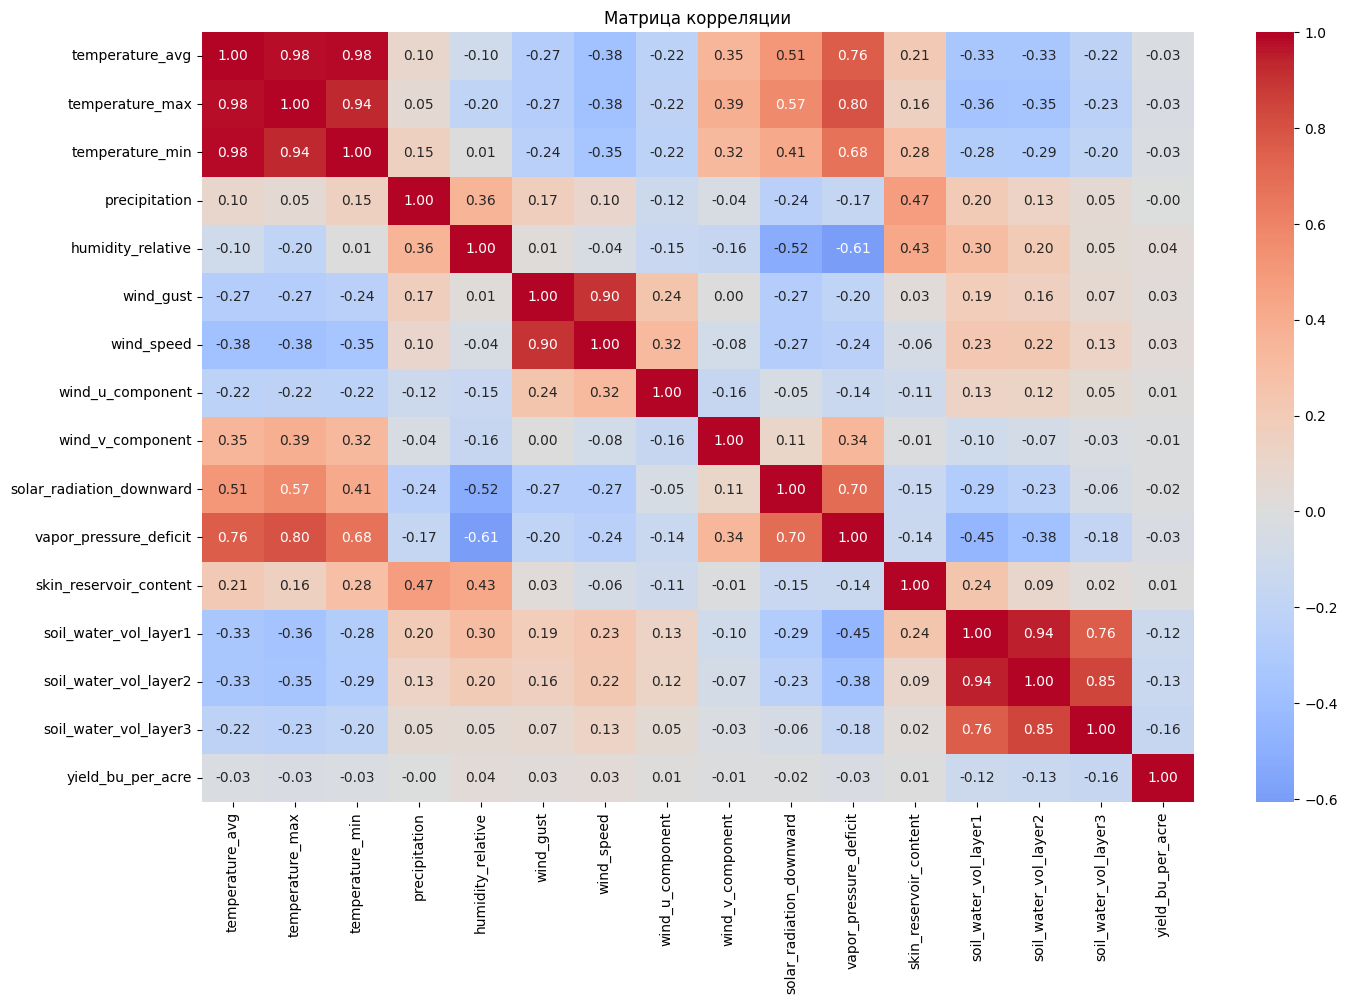

In [15]:
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Матрица корреляции")
plt.show()

## Выводы

- `temperature_avg`, `temperature_max`, `temperature_min`: логично, что имеется сильная корреляция. Стоит оставить только одну.
- `soil_water_vol_layer1`, `soil_water_vol_layer2`, `soil_water_vol_layer3` - тоже имеется сильная корреляция, но убирать не стоит. Малое различие во влажности на разных уровнях может играть большую роль.
- У многих признаков можно заметить выбросы. Они скорее всего зависят от региона. В любом случае данных мало, поэтому пока оставим их в покое.
- В остальном сложно что-то сказать: признаки меняются во времени и для них соответствует только одна целевая переменная для региона. Т.е. целевая переменная зависит от характера изменений признаков.